#  <center> Obravnava vezij vzbujanih z izmeničnimi signali s kompleksnim računom  </center>

<br>
<center>Dejan Križaj, 2019</center>

**Namen:** Zvezek (Notebook) je namenjen seznanjanju študentov z uporabo Jupytra za analizo vezij vzbujanih z izmeničnimi signali z uporabo kompleksnega računa. Prikazali bomo izračun nadomestne impedance ter prehod iz časovnega v kompleksni prostor in nazaj v časovnega. Rezultate bomo prikazali tako v časovnem prostoru kot v kompleksni ravnini s kompleksorji toka in napetosti. 

**Povezani zvezki:**


<div class="alert alert-block alert-info">
<b>Namig:</b> Obstajata dve verziji tega dokumenta. Ena je v obliki html datoteke (končnica html), ki je ni mogoče izvajati, druga pa ima končnico ipny (Jupyter Notebook), ki jo lahko izvajamo z Jupyter aplikacijo. To aplikacijo imate lahko naloženo na vašem računalniku in se izvaja v brskalniku, lahko jo ogledujete s spletno aplikacijo nbViewer, s spletnimi aplikacijami Binder ali Google Colab pa jo lahko tudi zaganjate in spreminjate. Več o tem si preberite v 
<a href="http://lbm.fe.uni-lj.si/index.php?option=com_content&view=article&id=59&Itemid=135&lang=si">tem članku</a>.
<br>    
Za izvajanje tega zvezka ne potrebujete posebnega znanja programiranja v Pythonu, lahko pa poljubno spreminjate kodo in se sproti učite tudi uporabe programskega jezika. Več podobnih primerov je na Githubu na https://github.com/osnove/Dodatno/
</div>

## Teorija supernakratko

Koncept impedance je povezan z uporabo kompleksnega računa pri obravnavi vezij, vzbujanih z izmeničnimi signali.

Vzemimo preprost primer vzbujanja 
zaporedne vezave upora in tuljave na izmenični vir napetosti. Za analizo takega preprostega vezja morali rešiti diferencialno enačbo $u_g(t)=R i(t)+L \frac {d i(t)}{dt}$. Temu se lahko izognemo, če uporabimo kompleksni račun in upoštevamo t.i. Eulerjevo enačbo $e^{jx}=\cos (x) +j \sin (x)$. Vzbujalni signal $u_g(t)=U_g \cos(\omega t)$ lahko torej zapišemo kot $ Re[U_g e^{j \omega t} ]$.
Vemo tudi, da bosta tako tok in napetost na elementih pri vzbujanju z izmeničnim signalom tudi izmenična signala, ki ju določa amplituda in fazni kot (faza). Splošna oblika toka bo tako $i(t)=I \cos(\omega t +\varphi_i) = Re[I e^{j \omega t + \varphi_i}] =  Re[I e^{j \varphi_i} e^{j \omega t} ] = Re[\underline{I}e^{j \omega t} ] $. $\underline{I}=I e^{j \varphi_i}$ imenujemo kompleksor toka. Vsebuje informacijo o amplitudi in faznemu kotu, kar pa je tudi vse, kar določa tok v vezju.

Zgornji zapis toka lahko uporabimo v diferencialni enačbi. Z odvajanjem eksponentne funkcije dobimo zopet eksponentno funkcijo, tako lahko diferencialno enačbo prevedemo v preprosto algebrajsko enačbo
$\underline{U}=R \underline{I}+j\omega L \underline{I}$. Od tod sledi, da je kompleksor toka 
$\underline{I}=\frac{\underline{U}}{R +j\omega L }$. Rešitev prevedemo na realni in imaginarni del ali pa amplitudo in fazo. Nato lahko sestavimo nazaj časovni signal tako, da rešitev pomnožimo z $e^{j \omega t }$ in upoštevamo le realni del. 

V kompleksnem zapisu lahko torej Ohmov zakon zapišemo v obliki $\underline{U}=\underline{Z}\underline{I}$. 
$\underline{Z}$ imenujemo impedanca, in je kvocient med kompleksorjem napetosti in toka:

$\underline{Z}=\frac{\underline{U}}{\underline{I}}$. Poznamo tudi pojem admitance, ki je $\underline{Y}=\frac{{1}}{\underline{Z}}=\frac{\underline{I}}{\underline{U}}$.

Impedanca upora je očitno $\underline{Z}_R=R$, tuljave $\underline{Z}_L={j\omega L}$ in kondenzatorja $\underline{Z}_C=\frac{1}{j\omega C}$ .

Admitanca upora je $\underline{Y}_R=1/R = G$, tuljave $\underline{Y}_L=\frac{1}{j\omega L}$ in kondenzatorja $\underline{Y}_C={j\omega C}$ .


***
## Jupyter in kompleksni račun

Imaginarno število Python "razume", če za številom dodamo črko j. Če napišeš j pred število, Python javi napako. Poglejmo par spodnjih računov.

In [2]:
a=3+2j
b=1j
c=-1-2j
print(a+b)
print(a*b)
print(a*a)
print(b*b)

(3+3j)
(-2+3j)
(5+12j)
(-1+0j)


Druga varianta je, da uporabimo ukaz complex(x,y), ki naredi kompleksno število x+jy.

In [3]:
z=complex(3,2)
z

(3+2j)

Realni del, imaginarni del in fazni kot dobimo na sledeč način

In [4]:
print(a.real)
print(a.imag)
print(phase(a))

3.0
2.0


NameError: name 'phase' is not defined

Jupyter javi napako, ker ukaz phase spada v knjižnico (modul) cmath. Če vključimo ta modul, lahko uporabimo še druge ukaze. Poleg tega vključimo še modul numpy, ki z nekoliko drugačnimi ukazi tudi omogoča račune s kompleksnimi števili.

In [14]:
import cmath as cm # pred ukaze iz te knjižnice moramo dati cm.
import numpy as np # dodamo še numerično knjižico 

# Izračun faznega kota
print(cm.phase(b))  # fazni kot v radianih
print(cm.phase(b)*180/cm.pi)  # fazni kot v stopinjah
print(cm.phase(c)*180/cm.pi)  # fazni kot v radianih
fi=np.arctan(c.imag/c.real) # primerjam z izračunom z arcus tanges
print('Fazni kot =',fi)
print('Fazni kot v stopinjah=',np.rad2deg(fi)) # pretvorba iz rad v deg
#POZOR: cm.phase() pravilno upošteva, da je kompleksor v tretjem kvadrantu, medtem ko izračun z Arctan 
#       da rezultat kot v prvem kvadrantu. Rešitev je ta, da sami prištejemo pi ali pa da uporabimo funkcijo arctan2()
print(np.arctan2(c.imag,c.real)*180/cm.pi) # uporaba arctan2()


# Absolutna vrednost
print(abs(a))  # abs vrednost od a
print('Preverim abs:',np.sqrt(a.real*a.real+a.imag*a.imag))
print(np.abs(a))  # abs vrednost od a s knjižnico numpy

# Uporaba Numpy modula
print('Real(a) = ', np.real(a)) 
print('Imag(a) = ', np.imag(a))
print('Fazni kot(a) = ', np.angle(a))
print('Fazni kot(a) v stopinjah = ', np.angle(a,deg=True))
print('Conjugate(a) = ', np.conj(a))

1.5707963267948966
90.0
-116.56505117707799
Fazni kot = 1.1071487177940904
Fazni kot v stopinjah= 63.43494882292201
-116.56505117707799
3.6055512754639896
Preverim abs: 3.605551275463989
3.6055512754639896
Real(a) =  3.0
Imag(a) =  2.0
Fazni kot(a) =  0.5880026035475675
Fazni kot(a) v stopinjah =  33.690067525979785
Conjugate(a) =  (3-2j)


Modul cmath ima tudi ukaze $polar()$, ki iz rektangularnega zapisa prevede v polarni in funkcijo $rect()$, ki iz polarnega zapisa naredi rektangularnega.

In [15]:
d=cm.polar(a) # pretvorba v polarni zapis z amplitudo in fazo
print(d)
print(type(d)) # d je tipa tuple, po slovensko terka
print(d[0],d[1]) # prvi člen d-ja dobimo kot d[0], drugega kot d[1]
a_nazaj=cm.rect(d[0],d[1]) # pretvorba iz polarnega v rektangularnega
print(a_nazaj )
# ugotovimo, da pridemo do problema zaokroževanja, ki sicer ne vpliva mnogo na končen rezulat ...
# ni pa zelo praktičen ali lep izpis. Lahko ga "popravimo", če uporabimo funkcijo zaokroževanja round)()
print(np.round(a_nazaj,2) )

(3.6055512754639896, 0.5880026035475675)
<class 'tuple'>
3.6055512754639896 0.5880026035475675
(3.0000000000000004+1.9999999999999998j)
(3+2j)


### Zdaj pa ti
Imamo dve kompleksni števili z1=2+j in z2=-1-j3. 
Določi:
* absolutno vrednost produkta z1 in z2
* absolutno vrednost z1 primerjaj z izrazom, ki pretvori rektangularni v polarni zapis
* absolutno vrednost z1 primerjaj z izrazom, ki ga dobiš z množenjem s konjugirano vrednostjo
* na tri načine poišči fazni kot kompleksorja z2

(V spodnjo celico vneseš izraze in celico zaženeš s Ctrl-Enter. Rešitve so na koncu zvezka.)

## Risanje kompleksorjev v kompleksni ravnini

V ta namen moramo sami ustvariti obliko koordinatnega sistema. Spodaj je prikazanih nekaj možnih načinov. V prvem uporabimo klasično strukturo grafa in dodamo kompleksorje kot puščice. V drugem dodamo puščice za označitev kompleksne ravnine iz središča (0,0). V tretjem premaknemo X in Y os na sredino. Na koncu poglavja je dodan še poseben primer, v katerem prikažemo možnost uporabe funkcij, shranjenih v ločeni datoteki.
Izrišimo kompleksorje a, b in c iz prejšnje obravnave.

### Izris kompleksorjev v običajnem grafu

c:\users\dean\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


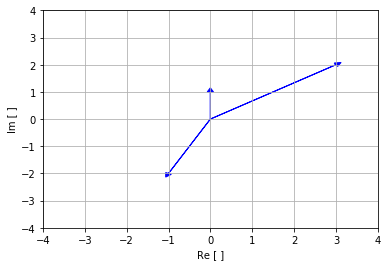

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.grid()
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xlabel('Re [ ]')
plt.ylabel('Im [ ]')
plt.arrow(0, 0, a.real, a.imag, head_width=a/20, head_length=a/20, fc='b', ec='b');
plt.arrow(0, 0, b.real, b.imag, head_width=a/20, head_length=a/20, fc='b', ec='b');
plt.arrow(0, 0, c.real, c.imag, head_width=a/20, head_length=a/20, fc='b', ec='b');

### Izris z dodano označitvijo kompleksne ravnine
Če želimo, lahko z nekaj dodatnega dela ustvarimo še obliko in označbo osi, kot smo jo vajeni - tako, ki poteka skozi koordinatno izhodišče. Preprosto dodamo še dva vektorja in označitve osi.

Text(3.044441020371192, -0.380555127546399, 'Re')

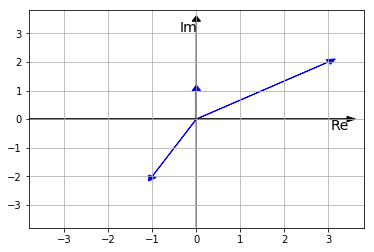

In [8]:
w=abs(a)+0.2 # velikost osi določimo relativno glede na velikost kompleksorja a

plt.figure()
plt.axis("on")
plt.grid()
plt.xlim(-w,w)
plt.ylim(-w,w)
plt.arrow(0, 0, a.real, a.imag, head_width=w/20, head_length=w/20, fc='b', ec='b');
plt.arrow(0, 0, b.real, b.imag, head_width=w/20, head_length=w/20, fc='b', ec='b');
plt.arrow(0, 0, c.real, c.imag, head_width=w/20, head_length=w/20, fc='b', ec='b');
plt.arrow(0, -w, 0, 1.9*w, head_width=w/20, head_length=w/20, fc='k', ec='k');
plt.arrow(-w, 0, 1.9*w, 0, head_width=w/20, head_length=w/20, fc='k', ec='k');
plt.text(-0.1*w, 0.8*w, "Im", fontsize=14)
plt.text( 0.8*w,-0.1*w, "Re", fontsize=14)
# Ugotovimo, da head_length naredi puščico, ki šele začne od točke, ki jo kaže kompleksor

### Izris s premaknitvijo X in Y osi na sredino

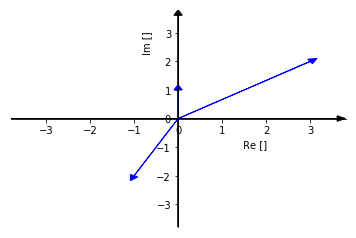

In [9]:
fig, ax = plt.subplots()
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xlabel('                                                 Re []')
ax.set_ylabel('                                                 Im []')
plt.xlim(-w,w)
plt.ylim(-w,w)
plt.arrow(-w, 0, 1.95*w, 0, head_width=w/20, head_length=w/20, fc='k', ec='k');
plt.arrow(0, -w, 0, 1.95*w, head_width=w/20, head_length=w/20, fc='k', ec='k');
plt.arrow(0, 0, a.real, a.imag, head_width=w/20, head_length=w/20, fc='b', ec='b');
plt.arrow(0, 0, b.real, b.imag, head_width=w/20, head_length=w/20, fc='b', ec='b');
plt.arrow(0, 0, c.real, c.imag, head_width=w/20, head_length=w/20, fc='b', ec='b');

### Zdaj pa ti

* dodaj v graf še kompleksorja z1 in z2 (z1=2+j , z2=-1-j3). Npr. z rdečo barvo.
* bi znal izračunati z3=z2-z1 in prikazati na grafu z izhodiščem v točki z2?
* <b> In še mali programerski izziv: </b> V zgornjem primeru bi bilo lepše, če bi se puščica zaključila v točki, ki jo določa kompleksor. Sedaj je tako, da se puščica doda na koncu daljice, kar povzroči, da konica puščice kaže nekoliko dlje, kot je pravilno. Poiščite način, da bi to popravili. (Rešitev je na koncu zvezka.)

### Še možnost uporabe polarnega koordinatnega sistema

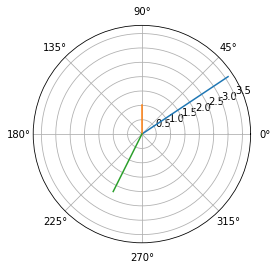

In [10]:
plt.figure()
plt.polar([0,np.angle(a)],[0,abs(a)],marker='')
plt.polar([0,np.angle(b)],[0,abs(b)],marker='')
plt.polar([0,np.angle(c)],[0,abs(c)],marker='')

## Obravnava izmeničnih vezij s kompleksnim računom

Kot smo ugotovili v uvodu, lahko vezje vzbujano z izmeničnim signalom obravnavamo z uporabo kompleksnega računa.
V prvem primeru bomo poiskali nadomestno impedanco vezja, v drugem primeru pa bomo celovito obravnavali preprosto zaporedno vezavo upora in tuljave priključeno na  izmenični napetostni vir.

### Izračun nadomestne impedance vezja

Računanje nadomestne impedance je preprosto. Pogledati je potrebno, kako so vezani posamezni elementi in jih ustrezno (vzporedno ali zaporedno) seštevati. V določenih primerih je možno, da so elementi vezja povezani tako, da vzporedno-zaporedna vezava ni možna. Ena od takih variant je lahko vezava v trikot ali zvezdo, ki se jo z ustreznimi enačbami da pretvarjati med sabo. V še bolj splošnih primerih pa lahko nadomestno impedanco izračunamo z analizo vezja, kjer se predpostavi, da je na vezje priključen nek napetostni ali tokovni vir in se izračuna tok ali napetost na zunanjih sponkah. Potem je $\underline{Z}_{nad}=\frac{\underline{U}}{\underline{I}}$. Analizo vezij, kjer je potrebno rešiti sistem enačb, obravnavamo v posebnem zvezku.

V tem podpoglavju bomo izračunali nadomestno impedanco spodnjega vezja.


<img src="https://raw.githubusercontent.com/osnove/Slike/master/impedanca_2.png" style="height:150px" align="left"> 
Izračunajmo nadomestno impedanco vezja za podatke:

$\quad C=1 \, \mu $F <br>
$\quad L=2 $mH <br>
$\quad R = 20 \, \Omega$ <br>
$\quad f = 5 \, $ kHz

In [11]:
C=1e-6
L=2e-3
R=20
freq=5e3
omega=2*np.pi*freq

# Izračun impedanc
ZL=1j*omega*L # POZOR: ČE BI NAPISAL SAMO j, BI JUPYTER JAVIL NAPAKO. 
ZC=1/(1j*omega*C)

# Vzporedna vezava L in R
YRL=1/R+1/ZL
ZRL=1/YRL

# Zaporedna vezava C in ZRL
Znad=ZC+ZRL
print("Nadomestna impedanca je Znad =",np.round(Znad,3))

Nadomestna impedanca je Znad = (18.16-26.05j)


In [12]:
# Enako kot prej samo vse v enem koraku

Znad=1/(1j*omega*C)+1/(1/R+1/(1j*omega*L))
print("Nadomestna impedanca je Znad =",np.round(Znad,3))

Nadomestna impedanca je Znad = (18.16-26.05j)


### Primer obravnave RL vezja s kompleksnim računom

Z uporabo kompleksnega računa bomo izračunali impedanco vezja ter nato tok in napetost na posameznih elementih. Kompleksorje bomo pretvorili v časovni signal in jih prikazali grafično.


<img src="https://raw.githubusercontent.com/osnove/Slike/master/impedanca_1.png" style="height:150px" align="left"> 

Izračunajmo tok in napetosti v vezju za naslednje podatke:

$\quad u_G(t)=50 \cos (20 t) $  V  <br>
$\quad L=100 $ mH <br>
$\quad R = 2 \, \Omega$ <br>

In [13]:
L=100e-3
R=2
U=50
omega=20
ZL=1j*omega*L

# Izračun impedance
ZRL=R+ZL
print('ZRL = ',ZRL)

# Izračun kompleksorja toka
I=U/ZRL
print('I = ',I)

# Izračun amplitude in faze
Iabs=abs(I); print('Iabs = ',Iabs)
fi=np.angle(I,deg=True); print('Faza = ',fi)

ZRL =  (2+2j)
I =  (12.5-12.5j)
Iabs =  17.67766952966369
Faza =  -45.0


Določili smo amplitudo in fazni kot toka. Sedaj lahko tvorimo časovni signal, kot smo to opisali v uvodu. Formalno to naredimo tako, da pomnožimo dobljeni kompleksor z $e^{j \omega t}$ in vzamemo realni del. V praksi to pomeni, da je rezultat $i(t)=I \cos (\omega t + \varphi)$. 
V konkretnem primeru torej $i(t)=17.68 \cos (20 t -45)$ A. (Če boš spreminjal vrednosti parametrov, se seveda spremenijo tudi vrednosti v enačbi).

Signala lahko še izrišemo v grafu, najbolje tako, da napetostni in tokovni signal rišemo na dveh ločenih Y oseh. Glej primer na strani https://github.com/osnove/Dodatno/blob/master/oe1_Q_i.ipynb.

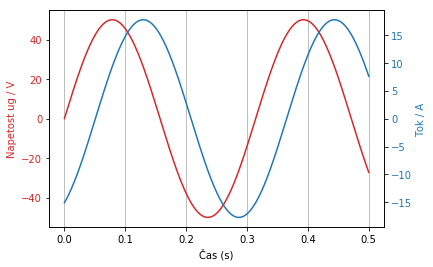

In [33]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

t = np.linspace(0.0, 10/omega, 1000)
ug=U*np.sin(omega*t)
i=Iabs*np.sin(omega*t+fi)


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Čas (s)')
ax1.set_ylabel('Napetost ug / V', color=color)
ax1.plot(t, ug, color=color)

ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='x')

ax2 = ax1.twinx()  # x os za drugi plot naj bo enaka x osi prvega plota
color = 'tab:blue'
ax2.set_ylabel('Tok / A', color=color)  
ax2.plot(t, i, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.show()

#### Opravi naslednje analize:
1. Spreminjaj vrednosti upora in tuljave in opazuj spremembe.
2. Spreminjaj frekvenco signala in opazuj spremembe. Na videz ni dosti sprememb, ker je časovni prikaz normiran na prikaz slabih dveh period. Enako je s prikazom toka, ki je normiran na maksimalno vrednost, zato je potrebno opazovati vrednosti na Y osi.
3. Dodaj grafu še izris napetosti na uporu in tuljavi. (Rešitev je na koncu zvezka). Opazujte napetost na uporu in tuljavi pri frekvencah 20 Hz in 200 Hz.
4. Prikaži kompleksorje toka in napetosti v kompleksni ravnini. Pozor: kompleksorji toka in napetosti so različnih velikosti zato moramo izbrati različna merila za tok in napetost, da jih lahko rišemo v istem grafu. (Rešitev je na koncu zvezka).


### Zdaj pa ti


<img src="https://raw.githubusercontent.com/osnove/Slike/master/impedanca_2.png" style="height:150px" align="left"> 
Vzemi že obravnavano vezje in izračunaj tokove v vezju ter jih prikaži v kompleksni ravnini za vzbujanje vezja 
z napetostnim signalom $\; u_G(t)=20 \cos (1000 t) $  V . 
Rešitev je na koncu zvezka.<br> 

$\quad C=50 \, \mu $F <br>
$\quad L=5 $mH <br>
$\quad R = 2 \, \Omega$ <br>


## Zaključek

V zvezku smo spoznali način obravnave vezij vzbujanih z izmeničnimi signali s kompleksnim računom. Pri tem je potrebno znati zapisati impedance posameznih elementov vezja ter njihovo vezavo. Poznati je potrebno tudi način pretvorbe časovnega signala v kompleksor in obratno - iz kompleksorja zapisati časovni signal.

Spoznali smo več načinov izrisa rezultatov: lahko z risanjem časovnega poteka tokov in napetosti, z risanjem amplitude in faze kot funkcijo frekvence ali pa s kazalci v kompleksni ravnini. Vsak način zase nam da določen vpogled v tokovno/napetostne razmere v vezju. 

**Naslednje branje:** Obravnava resonančnega pojava

## Dodatno - zapis funkcije v drugi datoteki in vnos
Spodnja celica naredi kompleksno ravnino s pomočjo funkcije complex_plane, ta pa se nahaja v datoteki funkcije.py, ki jo pokličemo z ukazom **from funkcije import complex_plane**, enako, kot vnesemo druge module. Datoteka funkcije.py se mora nahajati v isti mapi, kot ta zvezek. Vsebina datoteke funkcije je prikazana v celici na koncu zvezka. Lahko jo tudi izvedete (s Ctrl-Enter), kar bo tudi omogočalo izvajanje funkcij v spodnji celici. 

Funcija cc() zmanjša velikost vektorja za velikost puščice.

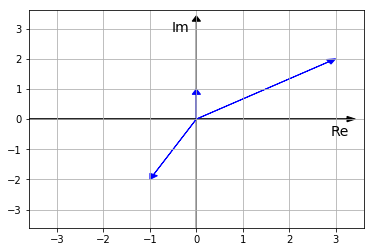

In [34]:
from funkcije import complex_plane, cc
import matplotlib.pyplot as plt
%matplotlib inline

w=abs(a)   # koordinatni sistem določim glede na največji kompleksor, ki jih rišem     
complex_plane(w,True) # w je največji kompleksor, True je za prikaz mreže, False brez
%config InlineBackend.close_figures=False # keep figures open in pyplot # da ostane graf odprt za dodatne plote
plt.arrow(0, 0, cc(a,w).real, cc(a,w).imag, head_width=w/20, head_length=w/20, fc='b', ec='b');
plt.arrow(0, 0, cc(b,w).real, cc(b,w).imag, head_width=w/20, head_length=w/20, fc='b', ec='b');
plt.arrow(0, 0, cc(c,w).real, cc(c,w).imag, head_width=w/20, head_length=w/20, fc='b', ec='b');

## Rešitve

In [18]:
""" Rešitev iz 2.1: Imamo dve kompleksni števili z1=2+j in z2=-1-j3. 
Določi:
* absolutno vrednost produkta z1 in z2
* absolutno vrednost z1 primerjaj z izrazom, ki pretvori rektangularni v polarni zapis
* absolutno vrednost z1 primerjaj z izrazom, ki ga dobiš z množenjem s konjugirano vrednostjo
* na tri načine poišči fazni kot kompleksorja z2 """
z1=2+1j
z2=-1+3j

print(abs(z1*z2))

print(abs(z1),cm.polar(z1)[0])

print(np.sqrt(z1*np.conj(z1))) # še vedno vrne kompleksno število, je pa Imag del enak nič

# Fazni kot z2 na tri načine
print(np.angle(z2))
print(cm.phase(z2))
print(np.arctan2(z2.imag,z2.real))

7.0710678118654755
2.23606797749979 2.23606797749979
(2.23606797749979+0j)
1.892546881191539
1.892546881191539
1.892546881191539


In [ ]:
""" Rešitev malega programerskega izziva iz 3.4:
odšteti moramo dolžino vektorja tako, da upoštevamo velikost puščice v Re in Im smeri.
"""
fi_a=np.angle(a)
plt.arrow(0, 0, a.real-a/20*np.cos(fi_a), a.imag-a/20*np.sin(fi_a), head_width=a/20, head_length=a/20, fc='b', ec='b');


In [ ]:
""" Vsebina datoteke funkcije.py. Skopiraj vsebino te celice v datoteko funkcije.py in 
jo postavi v mapo v kateri je tudi ta zvezek (impedanca.ipny)."""

import matplotlib.pyplot as plt
import numpy as np # dodamo še numerično knjižico 
get_ipython().run_line_magic('matplotlib', 'inline')


def complex_plane(w,axis_on=False):
    """Naredi kompleksno ravnino za
    w=največji kompleksor, ki bo v ravnini
    axis_on=True za prikaz mreže"""
    w=abs(w)
    if axis_on==True: 
        plt.axis("on")
    else: 
        plt.axis("off")
    plt.grid()
    plt.xlim(-w,w)
    plt.ylim(-w,w)
    plt.arrow(0, -w, 0, 1.9*w, head_width=w/20, head_length=w/20, fc='k', ec='k');
    plt.arrow(-w, 0, 1.9*w, 0, head_width=w/20, head_length=w/20, fc='k', ec='k');
    plt.text(-0.15*w, 0.8*w, "Im", fontsize=14)
    plt.text( 0.8*w,-0.15*w, "Re", fontsize=14)
    

def cc(z,w):
    """Popravi kompleksor za izris v kompleksni ravnini
    z= vhodni kompleksor
    w=največji kompleksor, s katerim je bila narejena ravnina"""
    fi_a=np.angle(z)
    x=z.real -abs(w)/20*np.cos(fi_a)
    y=z.imag-abs(w)/20*np.sin(fi_a)
    return np.complex(x,y)

In [ ]:
"""Rešitev iz 4.1: izračun napetosti na uR in uL
V kodi dodamo naslednje vrstice """

uR=R*i
uL=ug-uR

ax1.plot(t, uR, color='b')
ax1.plot(t, uL, color='b')

In [ ]:
"""Rešitev iz 4.2: izris kompleksorjev toka in napetosti v vezju """

L=100e-3
R=2
# Najprej določimo kompleksorje napetosti vira, krožno frekvenco, ZL
U=50
omega=20
ZL=1j*omega*L

U=50
Znad=R+ZL
I=U/Znad
UR=R*I
UL=1j*omega*L*I
print(UR,UL,I,U-UR)
I1=I*abs(Znad)

w=50*1.5
fig, ax = plt.subplots()
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xlabel('                                                 Re []')
ax.set_ylabel('                                                 Im []')
plt.xlim(-w,w)
plt.ylim(-w,w)
plt.arrow(-w, 0, 1.95*w, 0, head_width=w/20, head_length=w/20, fc='k', ec='k');
plt.arrow(0, -w, 0, 1.95*w, head_width=w/20, head_length=w/20, fc='k', ec='k');
plt.arrow(0, 0, U, 0, head_width=w/20, head_length=w/20, fc='b', ec='b');
plt.arrow(0, 0, UR.real, UR.imag, head_width=w/20, head_length=w/20, fc='b', ec='b');
plt.arrow(0, 0, UL.real, UL.imag, head_width=w/20, head_length=w/20, fc='b', ec='b');
plt.arrow(0, 0, I1.real, I1.imag, head_width=w/20, head_length=w/20, fc='r', ec='r');

(0.09174311926605505+1.0275229357798166j)
(0.3669724770642202+0.11009174311926606j)
(-0.27522935779816515+0.9174311926605505j)


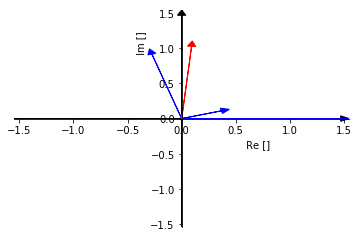

In [19]:
"""Rešitev izziva 4.3: Obravnava vezja in prikaz s kompleksorji v kompleksni ravnini"""
C=5e-5
L=5e-3
R=2
omega=1000
U=20

# Izračun impedanc
ZL=1j*omega*L # POZOR: ČE BI NAPISAL SAMO j, BI JUPYTER JAVIL NAPAKO. 
ZC=1/(1j*omega*C)

# Vzporedna vezava L in R
YRL=1/R+1/ZL
ZRL=1/YRL

# Zaporedna vezava C in ZRL
Znad=ZC+ZRL

# Izračun tokov
I=U/Znad; print(I)
IL=I*R/(R+ZL); print(IL)  # tokovni delilnik
IR=I*ZL/(R+ZL); print(IR) # tokovni delilnik
# print(I-IR-IL) # mora priti cca 0

# Izris kompleksorjev 
w=abs(I)*1.5
fig, ax = plt.subplots()
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xlabel('                                                 Re []')
ax.set_ylabel('                                                 Im []')
plt.xlim(-w,w)
plt.ylim(-w,w)
plt.arrow(-w, 0, 1.95*w, 0, head_width=w/20, head_length=w/20, fc='k', ec='k');
plt.arrow(0, -w, 0, 1.95*w, head_width=w/20, head_length=w/20, fc='k', ec='k');
plt.arrow(0, 0, U, 0, head_width=w/20, head_length=w/20, fc='b', ec='b');
plt.arrow(0, 0, IR.real, IR.imag, head_width=w/20, head_length=w/20, fc='b', ec='b');
plt.arrow(0, 0, IL.real, IL.imag, head_width=w/20, head_length=w/20, fc='b', ec='b');
plt.arrow(0, 0, I.real, I.imag, head_width=w/20, head_length=w/20, fc='r', ec='r');